Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b> Артем, привет, я думаю что устранил критические замечания, но есть вопрос с циклом в модели LGBMRegression в LinearRegressor все вроде норм. Посмотри пожалуйста, не понятно почему не перебераются параметры.</b>
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в доработке!

### <font color='orange'>Общее впечатление (ревью 3)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-3)" data-toc-modified-id="Общее-впечатление-(ревью-3)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 3)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

установим дату индексом датафрейма и отсортируем его

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [3]:
data.shape

(26496, 1)

проведем ресемплирование по 1 часу

In [4]:
data = data.resample('1H').sum()

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и ресемплинг проведены правильно.
</div>

## Анализ

In [5]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
num_orders    4416 non-null int64
dtypes: int64(1)
memory usage: 69.0 KB


пропусков нет. данные предоставлены от 1 марта 2018г по 31 августа 2018г (6 месяцев)

In [7]:
print(data.index.is_monotonic)

True


индексы в хронологическом порядке.

In [8]:
data['num_orders'].mean()

84.42278079710145

в среднем в час по 84 заказа

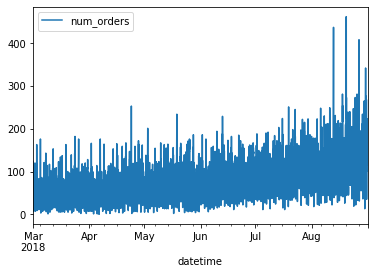

In [9]:
data.plot()

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что сам ряд был визуализирован.
</div>

цель у нас , конечно, другая, но интересно что спрос на услуги нашего такси растут

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Пожалуйста, проведи декомпозицию ряда по часам, построй графики тренда и сезоннсти, сделай выводы.
</div>

In [10]:
decomposed = seasonal_decompose(data) 

разложим декомпозицию на тренд, сезонность и остаточную компонениту

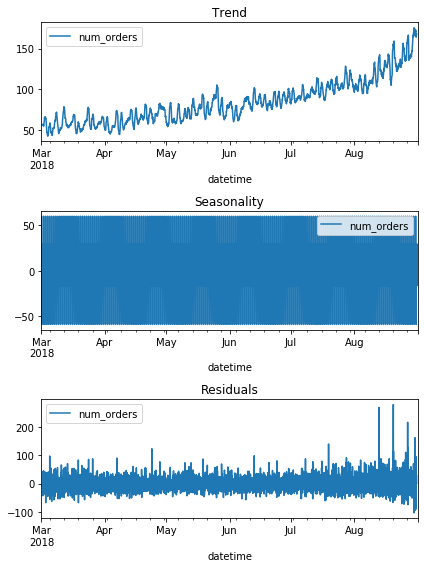

In [11]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

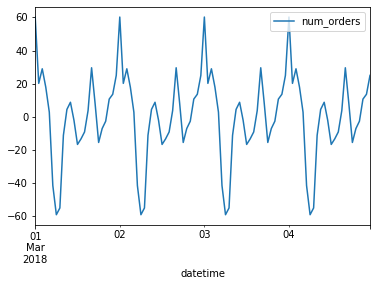

In [12]:
decomposed.seasonal['2018-03-01':'2018-03-04'].plot() 

тренд восходящий. услуги нашего такси с каждымднем днем пользуются все большим спросом

вполне очевидно, что сезонность имеет зависимость в 24 часа

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично, что ты визуализировал сезонность на более коротком интервале.
</div>

-----------------------------------------------------

Напишем функцию для создания дополнительных признаков

In [13]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было написать функцию таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
</div>

добавим в таблицу календарные признаки (год, месяц, день, день недели), отстающие значения (размер отставания поставим на 4) и скользящее среднее (поставим 4).

make_features(data, 20, 10)

In [14]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


удалим пустые значения

data = data.dropna() 

In [15]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)

In [16]:
print(train.shape)
print(test.shape)

(3974, 1)
(442, 1)


<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано правильно.
</div>

определим максимальные и минимальные значения train и test

In [17]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


создадим метрику RMSE, ей будем мерить эффективность

In [18]:
def rmse(target, predictions):
    return (((target - predictions)**2).mean())**0.5

## Обучение

в обучениии будут участвовать 3 модели LinearRegression и RandomForestRegressor

обучим линейную регрессию, поставим шаг в цикле равным 24 - время сезонности

In [19]:
tscv = TimeSeriesSplit()

In [20]:
model_l = LinearRegression()

In [21]:
%%time

best_lag = 1
best_rolling = 1
best_result = 10000
best_model_l = None

for rol in range(24, 100, 24):
    train['rolling_mean'] = train['num_orders'].shift().rolling(rol).mean()
    train['lag_1'] = train['num_orders'].shift(1)
    for lag in range(24, 100, 24):
        train['lag_{}'.format(lag)] = train['num_orders'].shift(lag)
        train = train.dropna()
        
        X_train = train.drop('num_orders', axis=1)
        y_train = train['num_orders']
        
        mse = cross_val_score(model_l, X_train, y_train, cv=tscv , scoring = make_scorer(mean_squared_error))
        rmse = (mse**0.5).mean()
       
        
        if rmse < best_result:
            best_result = rmse
            best_lag = lag
            best_rolling = rol
            best_model_l = model_l
            

            
print('Лучший результат RMSE', best_result)    
print('Лучший лаг', best_lag) 
print('Лучший размер скользящего среднего', best_rolling) 
print(best_model_l) 

Лучший результат RMSE 24.85928688126948
Лучший лаг 96
Лучший размер скользящего среднего 24
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CPU times: user 302 ms, sys: 97.1 ms, total: 399 ms
Wall time: 399 ms


In [22]:
train.head()

,num_orders,rolling_mean,lag_1,lag_24,lag_48,lag_72,lag_96
datetime,,,,,,,
2018-04-16 00:00:00,165,63.479167,119.0,106.0,153.0,113.0,85.0
2018-04-16 01:00:00,109,64.312500,165.0,33.0,104.0,67.0,73.0
2018-04-16 02:00:00,79,64.687500,109.0,54.0,52.0,39.0,76.0
2018-04-16 03:00:00,77,64.718750,79.0,82.0,75.0,73.0,72.0
2018-04-16 04:00:00,37,64.770833,77.0,15.0,62.0,59.0,30.0


In [23]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [24]:
train_R, test_R = train_test_split(data, shuffle=False, test_size=0.1)

In [25]:
%%time

best_lag_R = 0
best_rolling_R = 1
best_result_R = 100000
best_model_R = None 

for rol in range(24, 100, 24):
    train_R['rolling_mean'] = train_R['num_orders'].shift().rolling(rol).mean()
    train_R['lag_1'] = train_R['num_orders'].shift(1)
    for lag in range(24, 180, 24):
        train_R['lag_{}'.format(lag)] = train_R['num_orders'].shift(lag)
        train_R = train_R.dropna()        
        X_train = train_R.drop('num_orders', axis=1)
        y_train = train_R['num_orders']
        for est in range(1, 32, 5):
            for depth in range(1, 22, 5):
                model_R = RandomForestRegressor(random_state=False, n_estimators=est ,max_depth=depth)
                mse = cross_val_score(model_R, X_train, y_train, cv=tscv , scoring = make_scorer(mean_squared_error))
                rmse = (mse**0.5).mean()                    
                    
                if rmse < best_result_R:
                    best_result_R = rmse
                    best_lag_R = lag
                    best_rolling_R = rol
                    best_model_R = model_R
                    
print('Лучший результат RMSE', best_result_R)                    
print('Лучший лаг', best_lag_R)    
print('Лучший размер скользящего среднего', best_rolling_R)
print(best_model_R)
                                

Лучший результат RMSE 23.93286597542647
Лучший лаг 168
Лучший размер скользящего среднего 24
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=21,
                      n_jobs=None, oob_score=False, random_state=False,
                      verbose=0, warm_start=False)
CPU times: user 3min 10s, sys: 803 ms, total: 3min 11s
Wall time: 3min 11s


In [26]:
train_R.head()

,num_orders,rolling_mean,lag_1,lag_24,lag_48,lag_72,lag_96,lag_120,lag_144,lag_168
datetime,,,,,,,,,,
2018-06-27 00:00:00,134,86.625000,116.0,104.0,154.0,127.0,172.0,185.0,134.0,126.0
2018-06-27 01:00:00,89,86.229167,134.0,99.0,119.0,64.0,118.0,95.0,118.0,95.0
2018-06-27 02:00:00,124,85.927083,89.0,95.0,82.0,59.0,155.0,102.0,97.0,137.0
2018-06-27 03:00:00,128,85.604167,124.0,93.0,116.0,86.0,126.0,74.0,124.0,93.0
2018-06-27 04:00:00,121,85.625000,128.0,89.0,115.0,164.0,93.0,122.0,110.0,115.0


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Подбирать параметры по тренировочной выборке не имеет смысла. Пожалуйста, используй методы основанные на кросс-валидации. При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ты попробовал несколько разных моделей!
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> В момент начала цикла для lightGBM в объекте data уже есть 100 max_lag и rolling_mean = 100, так что во время цикла практически ничего не изменяется (можешь напечатать data и убедится). Чтобы избавиться от этой ошибки нужно исправить совет выше.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> Пожалуйста, хотя бы для одной из моделей реализуй подбор параметров к самой модели (например, количество деревьев).
</div>

## Тестирование

In [27]:
data_l = data.copy()

In [28]:
make_features(data_l, 96, 24)
data_l = data_l.dropna()
train, test = train_test_split(data_l, shuffle=False, test_size=0.1)

target_train = train['num_orders']
features_train = train.drop('num_orders', axis=1)
target_test = test['num_orders']
features_test = test.drop('num_orders', axis=1)

In [29]:
%%time

model = LinearRegression()
model.fit(features_train, target_train)
pred_test = model.predict(features_test)

print("RMSE тестовой выборки: ", (mean_squared_error(target_test, pred_test)**0.5))

RMSE тестовой выборки:  41.90878586783501
CPU times: user 92.6 ms, sys: 115 ms, total: 208 ms
Wall time: 193 ms


In [30]:
data_f = data.copy()

In [31]:
make_features(data_f, 168, 24)
data_f = data_f.dropna()
train, test = train_test_split(data_f, shuffle=False, test_size=0.1)

target_train = train['num_orders']
features_train = train.drop('num_orders', axis=1)
target_test = test['num_orders']
features_test = test.drop('num_orders', axis=1)

In [32]:
%%time
forest_model = RandomForestRegressor(random_state=False, n_estimators=21 ,max_depth=6)
forest_model.fit(features_train, target_train)
forest_predict = forest_model.predict(features_test)
print(mean_squared_error(target_test, forest_predict)**0.5)


41.90099099352408
CPU times: user 2.71 s, sys: 4 ms, total: 2.71 s
Wall time: 2.72 s


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Заче мобучать модели на тесте? Обучение можно проводить только на треине.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Да, это случайность
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Для повышения качества можешь увеличить параметр max_lag.
</div>

## Выводы

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48